In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
#from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression#resource: https://scikit-learn.org/stable/modules/linear_model.html
from sklearn import linear_model
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
gender_submission = pd.read_csv("data/gender_submission.csv")
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna("G6")
train["Embarked"] = train["Embarked"].fillna("Q")
print(pd.isnull(train).sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
df_train_ml = train.copy()
df_test_ml = test.copy()
df_train_ml.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


resource: https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner

In [4]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)
df_train_ml.dropna(inplace=True)

In [5]:
passenger_id = df_test_ml['PassengerId']
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare'],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(df_train_ml.drop('Survived',axis=1))
scaled_features = scaler.transform(df_train_ml.drop('Survived',axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features, columns=df_train_ml.columns[:-1])

# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features, columns=df_test_ml.columns)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('Survived',axis=1), df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_train_ml_sc, df_train_ml['Survived'], test_size=0.30, random_state=101)
X_train_sc

,Survived,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Pclass_2
520,-0.474545,-0.473674,-1.355574,-0.311914,0.619306,-0.510152,-1.107926
510,-0.474545,-0.473674,0.737695,3.206007,-1.614710,-0.510152,0.902587
446,-0.474545,0.767630,-1.355574,-0.311914,0.619306,1.960202,-1.107926
2,-0.474545,-0.473674,-1.355574,-0.311914,0.619306,-0.510152,0.902587
691,-0.474545,0.767630,-1.355574,-0.311914,-1.614710,-0.510152,0.902587
...,...,...,...,...,...,...,...
575,-0.474545,-0.473674,0.737695,-0.311914,0.619306,-0.510152,0.902587
838,-0.474545,-0.473674,0.737695,-0.311914,0.619306,-0.510152,0.902587
337,-0.474545,-0.473674,-1.355574,-0.311914,-1.614710,-0.510152,-1.107926
523,-0.474545,0.767630,-1.355574,-0.311914,-1.614710,-0.510152,-1.107926


In [8]:
# unscaled
X_train_all = df_train_ml.drop('Survived',axis=1)
y_train_all = df_train_ml['Survived']
X_test_all = df_test_ml

# scaled
X_train_all_sc = df_train_ml_sc
y_train_all_sc = df_train_ml['Survived']
X_test_all_sc = df_test_ml_sc

In [9]:
X_test_all.fillna(X_test_all.mean(), inplace=True)
print(X_test_all)
print("*")

     SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0        0      0         1           1           0         0         1
1        1      0         0           0           1         0         1
2        0      0         1           1           0         1         0
3        0      0         1           0           1         0         1
4        1      1         0           0           1         0         1
..     ...    ...       ...         ...         ...       ...       ...
413      0      0         1           0           1         0         1
414      0      0         0           0           0         0         0
415      0      0         1           0           1         0         1
416      0      0         1           0           1         0         1
417      1      1         1           0           0         0         1

[418 rows x 7 columns]
*


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[138  16]
 [ 42  72]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       154
           1       0.82      0.63      0.71       114

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

0.7835820895522388


In [12]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])
result

['versicolor']


array([1])

In [13]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

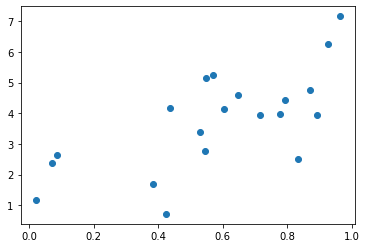

In [14]:
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

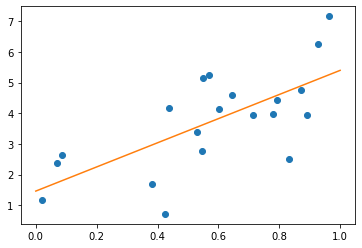

In [15]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

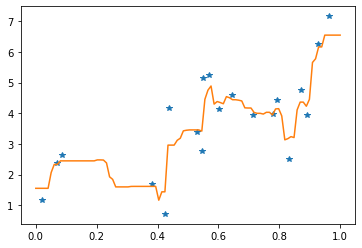

In [16]:

# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, '*')
plt.plot(X_fit.squeeze(), y_fit);

In [17]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [18]:
sex_mapping = {"male": 1, "female": 0}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [19]:

#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [20]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [22]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

81.73


In [23]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
172,3,1,1.000000,1,1,1
447,1,0,34.000000,0,0,1
597,3,0,49.000000,0,0,1
204,3,0,18.000000,0,0,1
240,3,1,29.699118,1,0,2
...,...,...,...,...,...,...
835,1,1,39.000000,1,1,2
192,3,1,19.000000,1,0,1
629,3,0,29.699118,0,0,3
559,3,1,36.000000,1,0,1
